In [19]:
from google.colab import drive
drive.mount("/gdrive", force_remount=True)
import warnings
warnings.filterwarnings('ignore')

Mounted at /gdrive


In [ ]:
#TBL(Transformation-Based Learning)
#dt앙상블 모델 -> random forest
#feature independent한 문제를 해결방안 : 연관된 feature들을 하나로 만든다 -> feature design을 잘한다.

In [32]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn import tree
import graphviz 

# 데이터 경로
file_path = "/gdrive/MyDrive/colab/dt/PlayTennis.csv"
# 데이터 경로로부터 파일을 읽음 (pandas 라이브러리 사용)
datas = pd.read_csv(file_path)

# 데이터 출력 (데이터 형태 확인)
print(datas)

     outlook  temp humidity  windy  day      time play
0      sunny   hot     high  False  Wed  09-30-00   no
1      sunny   hot     high   True  Tue  00-30-20   no
2   overcast   hot     high  False  Sat  12-30-30  yes
3      rainy  mild     high  False  Sun  10-30-30  yes
4      rainy  cool   normal  False  Sun  09-15-30  yes
5      rainy  cool   normal   True  Thu  14-30-30   no
6   overcast  cool   normal   True  Sun  16-30-30  yes
7      sunny  mild     high  False  Sat  23-30-30   no
8      sunny  cool   normal  False  Sun  16-30-30  yes
9      rainy  mild   normal  False  Sat  19-30-30  yes
10     sunny  mild   normal   True  Fri  20-20-15  yes
11  overcast  mild     high   True  Fri  10-30-30  yes
12  overcast   hot   normal  False  Sun  18-30-30  yes
13     rainy  mild     high   True  Wed  03-30-30   no


In [23]:
def customDay(arr) :
   for i in range(len(arr['day'])):
     if arr['day'][i]=="Sat" : 
       arr['day'][i] = 'leisureday'
       
     elif arr['day'][i]=="Sun" :
       arr['day'][i] = 'leisureday'
     else :
       arr['day'][i] = 'busyday'

def customTime(arr) :
  for i in range(len(arr['time'])):
    #시간으로만 구분하기 위해 슬라이스
    temp = int(arr['time'][i][0:2])
    #조금 한가한 시간
    if 9<=temp<=15 :
      arr['time'][i] = "freetime"
    #가장 한가한 시간
    elif 16<=temp<=21 :
      arr['time'][i] = "leisuretime"
    #테니스를 치지 않을 시간
    else : 
      arr['time'][i] = "sleeptime"

**Day**

> 


기본적으로 테니스를 평일보다 주말에 많이 치는 것 같아서 엑셀에 값을 넣어줄때 테니스를 'play'한날은 주로 주말을 넣어주었고, 'play'하지 않은 날에는 평일을 넣어주었습니다.

'day' 자질의 값이 월요일 ~ 금요일인 경우는 'busyday'로 다시 값을 할당하고, 'day' 자질의 값이 토요일, 일요일인 경우에는 'freeday'로 값을 할당해주었습니다. -> 바로 수치값을 할당해도 좋지만, 시각화를 한 번 더 하기 위해 string값으로 일단 할당하였습니다.


>

> 







**Time**

> 


날짜와 마찬가지로 시간도 테니스를 'play'한 경우 테니스를 많이 칠것 같은 시간을 주었고, 'play'하지 않은 경우는 치지 않을 것같은 시간을 주었습니다.

시간을 기준으로 다시 값을 할당하였는데, 가장 테니스를 많이 칠 것 같은 16시 ~ 21시는 'leisuretime'으로 값을 다시 할당하였고, 다음으로 많이 칠것 같은 9시 ~ 15시는 'freetime'으로 값을 할당, 마지막으로 테니스를 칠것 같지않은 시간인 22시 ~ 8시는 'sleeptime'으로 값을 할당하였습니다.


In [33]:
customDay(datas)
customTime(datas)
datas 

,outlook,temp,humidity,windy,day,time,play
0,sunny,hot,high,False,busyday,freetime,no
1,sunny,hot,high,True,busyday,sleeptime,no
2,overcast,hot,high,False,leisureday,freetime,yes
3,rainy,mild,high,False,leisureday,freetime,yes
4,rainy,cool,normal,False,leisureday,freetime,yes
5,rainy,cool,normal,True,busyday,freetime,no
6,overcast,cool,normal,True,leisureday,leisuretime,yes
7,sunny,mild,high,False,leisureday,sleeptime,no
8,sunny,cool,normal,False,leisureday,leisuretime,yes
9,rainy,mild,normal,False,leisureday,leisuretime,yes


In [34]:
# 범주형 데이터를 수치형 데이터로 자동 변환해주는 라이브러리
label_encoder = LabelEncoder()

# 정답 클래스 이름 (yes, no)
target_names = label_encoder.fit(datas['play']).classes_
print("target_names : {}".format(target_names))

datas['outlook'] = label_encoder.fit_transform(datas['outlook']) # sunny : 2, rainy : 1 overcast : 0 ,".classes_" -> 0 :overcast인지 알 수 있다.
datas['temp'] = label_encoder.fit_transform(datas['temp']) # hot : 1, mild : 2, cool : 0
datas['humidity'] = label_encoder.fit_transform(datas['humidity']) 
datas['windy'] = label_encoder.fit_transform(datas['windy'])
datas['day'] = label_encoder.fit_transform(datas['day'])
datas['time'] = label_encoder.fit_transform(datas['time'])
datas['play'] = label_encoder.fit_transform(datas['play'])

# 데이터 출력 (데이터 포맷 변환 후 결과 확인)
print(datas)

target_names : ['no' 'yes']
    outlook  temp  humidity  windy  day  time  play
0         2     1         0      0    0     0     0
1         2     1         0      1    0     2     0
2         0     1         0      0    1     0     1
3         1     2         0      0    1     0     1
4         1     0         1      0    1     0     1
5         1     0         1      1    0     0     0
6         0     0         1      1    1     1     1
7         2     2         0      0    1     2     0
8         2     0         1      0    1     1     1
9         1     2         1      0    1     1     1
10        2     2         1      1    0     1     1
11        0     2         0      1    0     0     1
12        0     1         1      0    1     1     1
13        1     2         0      1    0     2     0


In [ ]:
# 입력 데이터와 정답 데이터로 분리
x_data, y_data = datas.drop(['play'], axis=1), datas['play'] # 1차원으로 자른다.

# 분리 결과 확인
print(x_data)
print()
print(y_data)

    outlook  temp  humidity  windy  day  time
0         2     1         0      0    0     0
1         2     1         0      1    0     2
2         0     1         0      0    1     0
3         1     2         0      0    1     0
4         1     0         1      0    1     0
5         1     0         1      1    0     0
6         0     0         1      1    1     1
7         2     2         0      0    1     2
8         2     0         1      0    1     1
9         1     2         1      0    1     1
10        2     2         1      1    0     1
11        0     2         0      1    0     0
12        0     1         1      0    1     1
13        1     2         0      1    0     2

0     0
1     0
2     1
3     1
4     1
5     0
6     1
7     0
8     1
9     1
10    1
11    1
12    1
13    0
Name: play, dtype: int64


In [ ]:
# Decision tree 모델 학습 ()
decision_tree = tree.DecisionTreeClassifier(criterion = 'entropy') # entropy를 기준으로 트리 구성
train_result = decision_tree.fit(x_data, y_data)


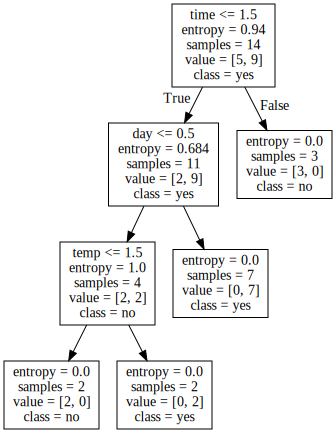

In [ ]:
# 학습 결과 확인 (graphviz 라이브러리 사용)
graph = graphviz.Source(tree.export_graphviz(train_result, out_file=None,feature_names=x_data.columns,class_names=target_names))
                                             
graph

In [ ]:
# 학습한 모델을 사용하여 예측
predict_result = decision_tree.predict(x_data) # closed Test, open Test -> x_data자리에 새로운 데이터 구성해서 넣어보면 된다.

# 예측 결과 출력 (실제 정답을 맞춘 경우 True로 표시됨)
print(predict_result == y_data)

0     True
1     True
2     True
3     True
4     True
5     True
6     True
7     True
8     True
9     True
10    True
11    True
12    True
13    True
Name: play, dtype: bool
